In [1]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
from astropy.table import Table
import os
from collections import OrderedDict
from adjustText import adjust_text

# markers and colors

In [3]:
colors_10 = cm.get_cmap('tab10', 10)

In [4]:
marker1=['.','*','+','x','v','^','<','>','1','2','3','4','8','p','P','h','H','X','D','d','|','_']
color1=['lightblue','blue','red','sandybrown','tan','gold','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','aqua','purple','magenta','yellow','lime','turquoise','lightcyan','teal','indigo']

## set_ax

In [5]:
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))

## convert_xaxis_mjd

In [6]:
f_1keV=2.418e17 #Hz
f_2keV=4.836e17 #Hz

from astropy.time import Time
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()

In [7]:
convert_xaxis_time(58600)

datetime.datetime(2019, 4, 27, 0, 0)

# 1ES1927

## xray

In [8]:
xray=pd.read_csv('/Users/brettlv/Downloads/1ES1927+654/data/nicerxrtxmm.py',delimiter='|',header=None)
xray.columns=['mjd','phase','EW','e_EW','E_EW','Line','Fx','e_Fx','E_Fx','Tel','l_mag']#,'mag','e_mag','Filt']

In [9]:
xray_tel=[]
for i in xray['Tel']:
    if i not in xray_tel:
        xray_tel.append(i)

In [10]:
xray_tel

['NICER     ', 'Swift-XRT ', 'XMM       ']

## optical

In [11]:
optical=pd.read_csv('/Users/brettlv/Downloads/1ES1927+654/data/asassn_uvot.py',
                    delimiter='|',header=None,na_values='     ')

optical.columns=['mjd','phase','EW','e_EW','E_EW','Line','Fx','e_Fx','E_Fx','Tel','l_mag','mag','e_mag','Filt']

 [AB magnitude System](https://www.cfa.harvard.edu/~dfabricant/huchra/ay145/mags.html)


This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1, m(AB) = -2.5 log(f) - 48.60 where the value of the constant is selected to define m(AB)=V for a flat-spectrum source. In this system, an object with constant flux per unit frequency interval has zero color. References:

Oke, J.B. 1974, ApJS, 27, 21

In [12]:
optical_tel=[]
for i in optical['Tel']:
    if i not in optical_tel:
        optical_tel.append(i)

In [13]:
optical_tel

['ASAS-SN   ', 'ATLAS     ', 'Swift-UVOT']

In [14]:
optical_filt=[]
for i in optical['Filt']:
    if i not in optical_filt:
        optical_filt.append(i)

In [15]:
optical_filt

['V', 'g', 'c', 'o', 'U', 'UVM2', 'UVW1', 'UVW2']

optical

## Halpha hbeta

In [18]:
Halpha_Hbeta=pd.read_csv('/Users/brettlv/Downloads/1ES1927+654/data/halpha.py',delimiter='|',header=None)

Halpha_Hbeta.columns=['mjd','phase','EW','e_EW','E_EW','Line']

Halpha=Halpha_Hbeta[Halpha_Hbeta['Line']=='H{alpha}']
Hbeta=Halpha_Hbeta[Halpha_Hbeta['Line']=='H{beta}']

## fig2 readme

In [ ]:
   1-  9  F9.3  d       MJD    [56734.5/58630.6] Modified Julian Date
                                of Observation (JD-2400000.5)
  11- 19  F9.3  d       Phase  [-1349.42/510.5] Phase in days since
                                2017 December 23 (MJD=58110.2)
  21- 27  F7.3  0.1nm   EW     [0.014/205]? Equivalent width in Angstrom units
  29- 34  F6.3  0.1nm e_EW     [0.014/27.2]? Lower uncertainty on EW
  36- 41  F6.3  0.1nm E_EW     [0.2/13.4]? Upper uncertainty on EW
  43- 50  A8    ---     Line   H{alpha} or H{beta}
  52- 59  F8.3  ---     Fx     [0.3/1298]? 0.5-10keV X-ray flux
  61- 66  F6.3  ---   e_Fx     [0/24]? Lower uncertainty on Fx
  68- 73  F6.3  ---   E_Fx     [0.1/16.5]? Upper uncertainty on Fx
  75- 84  A10   ---     Tel    Telescope (ASAS-SN, ATLAS, Swift-UVOT,
                                Swift-XRT, NICER or XMM)
      86  A1    ---   l_mag    [l] 3-sigma non-detection limit flag on mag
  88- 93  F6.3  mag     mag    [13.89/19.5]? Apparent magnitude in Filt
  95- 99  F5.3  mag   e_mag    [0.014/0.4]? Uncertainty on mag (G1)
 101-104  A4    ---     Filt   Filter (g, V; c, o or U, UVM2, UVW1, UVW2)
-

## lightcurve

In [20]:
xray.columns

Index(['mjd', 'phase', 'EW', 'e_EW', 'E_EW', 'Line', 'Fx', 'e_Fx', 'E_Fx',
       'Tel', 'l_mag'],
      dtype='object')

### X-ray

xray_paper_bokeh['ref'] = xray_paper_bokeh['ref'].astype(str)  

In [19]:
xray_tel

['NICER     ', 'Swift-XRT ', 'XMM       ']

Text(0, 0.5, 'flux()')

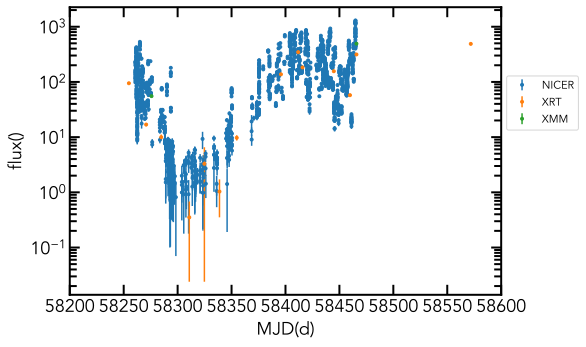

In [21]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(xray['mjd'])):
    if xray['Tel'][i]==xray_tel[0]:
        label=r'NICER'
        color=colors_10(0)
        
    elif xray['Tel'][i]==xray_tel[1]:
        label=r'XRT'
        color=colors_10(1)
        
    elif xray['Tel'][i]==xray_tel[2]:
        label=r'XMM'
        color=colors_10(2)        
        
    ax.errorbar(xray['mjd'][i], xray['Fx'][i],yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
plt.semilogy()
plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('MJD(d)')
plt.ylabel('flux()')

### optical

In [22]:
optical.columns

Index(['mjd', 'phase', 'EW', 'e_EW', 'E_EW', 'Line', 'Fx', 'e_Fx', 'E_Fx',
       'Tel', 'l_mag', 'mag', 'e_mag', 'Filt'],
      dtype='object')

In [23]:
optical_tel

['ASAS-SN   ', 'ATLAS     ', 'Swift-UVOT']

In [24]:
optical_filt

['V', 'g', 'c', 'o', 'U', 'UVM2', 'UVW1', 'UVW2']

In [25]:
colors_optical_filt=[]
for i in range(len(optical_filt)):
    colors_optical_filt.append(colors_10(i))
colors_optical_filt
optical_color_dict=dict(zip(optical_filt,colors_optical_filt))

optical_color_dict[optical['Filt'][0]]

Text(0, 0.5, 'mag()')

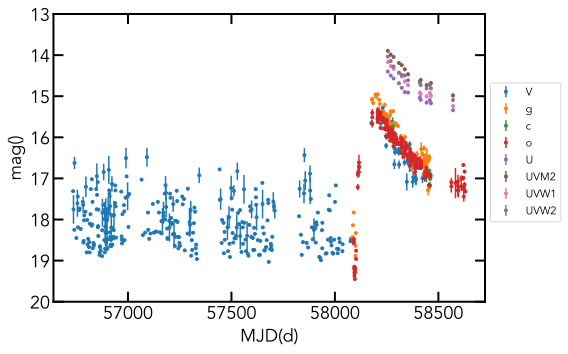

In [28]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

#ax.errorbar(xray['mjd'], xray['Fx'],yerr=[xray['e_Fx'],xray['E_Fx']])

for i in range(len(optical['mjd'])):
    color=optical_color_dict[optical['Filt'][i]]
    label=optical['Filt'][i]
    
    #print(optical['mjd'][i], optical['mag'][i],optical['e_mag'][i])
    if optical['e_mag'][i]:      
        ax.errorbar(optical['mjd'][i], optical['mag'][i],yerr=optical['e_mag'][i],
                    color=color,label=label,
                    ls='',marker='.')
    else:
        ax.errorbar(optical['mjd'][i], optical['mag'][i],
                    color=color,label=label,
                    ls='',marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)           
#plt.semilogx()
#plt.semilogy()
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(58200-300,58900)
plt.ylim(20,13)
plt.xlabel('MJD(d)')
plt.ylabel('mag()')

### Halpha_Hbeta

Text(0, 0.5, 'EW($\\AA$)')

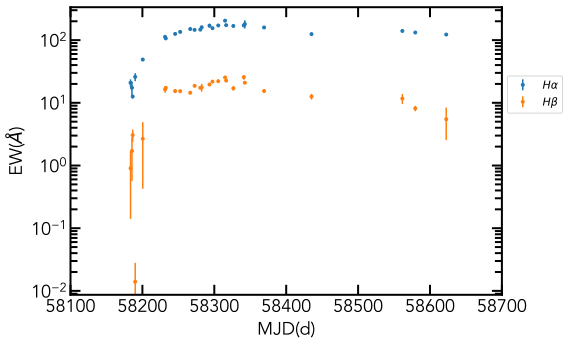

In [29]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

#ax.errorbar(xray['mjd'], xray['Fx'],yerr=[xray['e_Fx'],xray['E_Fx']])
for i in range(len(Halpha_Hbeta['mjd'])):
    if Halpha_Hbeta['Line'][i]=='H{alpha}':
        label=r'$H\alpha$'
        color=colors_10(0)
    elif  Halpha_Hbeta['Line'][i]=='H{beta}':
        label=r'$H\beta$'
        color=colors_10(1)
    
    ax.errorbar(Halpha_Hbeta['mjd'][i], Halpha_Hbeta['EW'][i],yerr=Halpha_Hbeta['e_EW'][i],
                ls='',color=color,label=label,
                marker='.')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)


#plt.semilogx()
plt.semilogy()
plt.xlim(58100,58700)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('MJD(d)')
plt.ylabel('EW($\AA$)')


# Stern2012

Type-1 low-z AGN emission properties : J/MNRAS/423/600


data_Stern2012=Table.read('ftp://cdsarc.u-strasbg.fr/pub/cats/J/MNRAS/423/600/table1.dat',
                      readme="ftp://cdsarc.u-strasbg.fr/pub/cats/J/MNRAS/423/600/ReadMe",
                      format="ascii.cds",)

In [30]:
data_Stern2012=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type-1 low-z AGN emission properties J_MNRAS_423_600/table1.dat',
                      readme="/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type-1 low-z AGN emission properties J_MNRAS_423_600/ReadMe",
                      format="ascii.cds",)

In [31]:
data_Stern2012.colnames

['Name',
 'z',
 'logLbHa',
 'W(bHa)',
 'logLKs',
 'logLH',
 'logLJ',
 'logLNUV',
 'n_logLNUV',
 'logLFUV',
 'n_logLFUV',
 'logLX']

In [64]:
data_Stern2012b.columns

Index(['Name', 'LbHa', 'FWHM', 'L[OIII]', 'LnHa', 'LUV', 'LX', 'f_L[OIII]',
       'f_LnHa', 'f_LUV', 'f_LX'],
      dtype='object')

In [63]:
data_Stern2012c_narraw.colnames

['Name',
 'l_logLHb',
 'logLHb',
 'l_logL[OIII]',
 'logL[OIII]',
 'l_logLHa',
 'logLHa',
 'l_logL[NII]',
 'logL[NII]',
 'l_logL[SII]',
 'logL[SII]',
 'l_logL[OI]',
 'logL[OI]',
 'fs',
 'fa',
 'BPT-[NII]',
 'BPT-[SII]',
 'BPT-[OI]']

In [32]:
data_Stern2012['logm']=7.4+2.06*np.log10(data_Stern2012['W(bHa)']/1000)+0.545*(data_Stern2012['logLbHa']-44)
data_Stern2012['m']=10**data_Stern2012['logm']

data_Stern2012['logL/Ledd']=0.6-2.06*np.log10(data_Stern2012['W(bHa)']/1000)+0.455*(data_Stern2012['logLbHa']-44)
data_Stern2012['logL']=np.log10(1.26*10**38)+data_Stern2012['logL/Ledd']+data_Stern2012['logm']

In [33]:
data_Stern2012.colnames

['Name',
 'z',
 'logLbHa',
 'W(bHa)',
 'logLKs',
 'logLH',
 'logLJ',
 'logLNUV',
 'n_logLNUV',
 'logLFUV',
 'n_logLFUV',
 'logLX',
 'logm',
 'm',
 'logL/Ledd',
 'logL']

## Lalpha

### LbHa WbHa

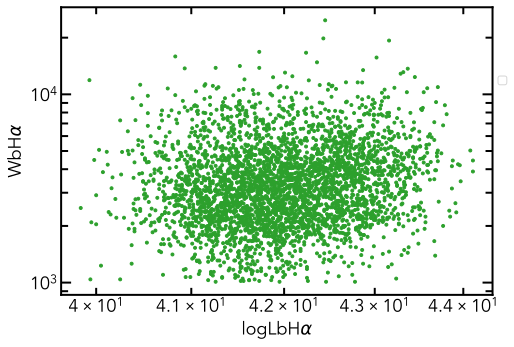

In [34]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLbHa'][i]
    y= data_Stern2012['W(bHa)'][i]
    if x and y:
        ax.errorbar(x,y,#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')


handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

plt.semilogx()
plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'WbH$\alpha$')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_walpha.png',dpi=400,transparent=False,bbox_inches='tight')

### LbHa LX

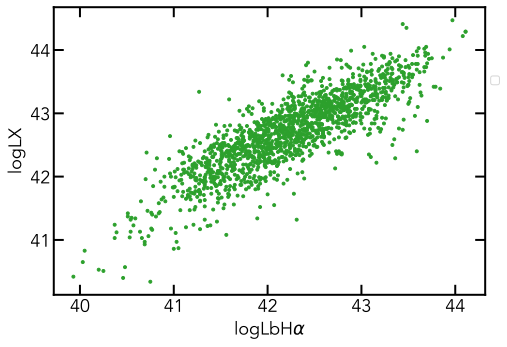

In [35]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLbHa'][i]
    y=data_Stern2012['logLX'][i]
    if x and y:
        ax.errorbar(x, y,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### LbHa LNUV

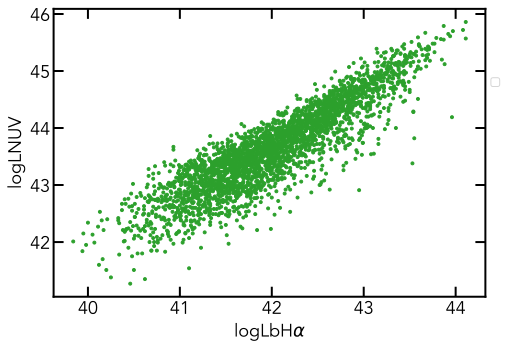

In [36]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLbHa'][i]
    y=data_Stern2012['logLNUV'][i]
    if x and y:
        ax.errorbar(x, y,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'logLNUV')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_LNUV.png',dpi=400,transparent=False,bbox_inches='tight')

### LbHa LFUV

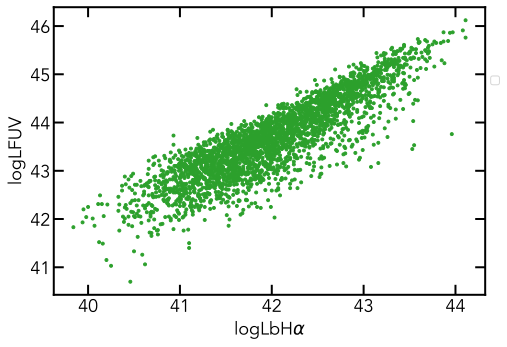

In [37]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLbHa'][i]
    y=data_Stern2012['logLFUV'][i]
    if x and y:
        ax.errorbar(x, y,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'logLFUV')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_LFUV.png',dpi=400,transparent=False,bbox_inches='tight')

### LbHa alpha_NUV_X

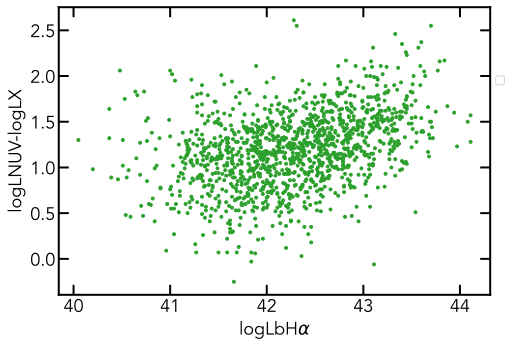

In [38]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLbHa'][i]
    y=data_Stern2012['logLNUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'logLNUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_LNUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### LbHa alpha_FUV-LX

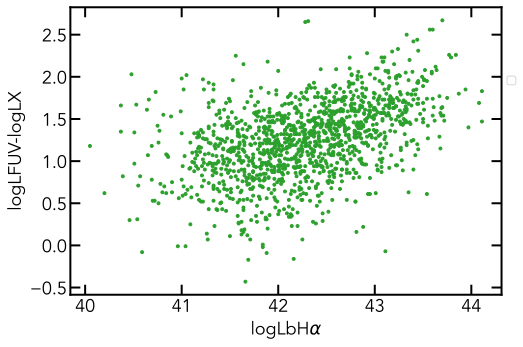

In [39]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    
    x=data_Stern2012['logLbHa'][i]
    y=data_Stern2012['logLFUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbH$\alpha$')
plt.ylabel(r'logLFUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lalpha_LFUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### L/Ledd alpha_NUV_X

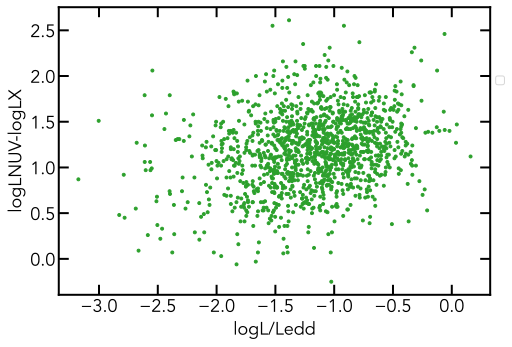

In [40]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logL/Ledd'][i]
    y=data_Stern2012['logLNUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logL/Ledd')
plt.ylabel(r'logLNUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/L_eddrate_LNUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### L/Ledd alpha_FUV_X

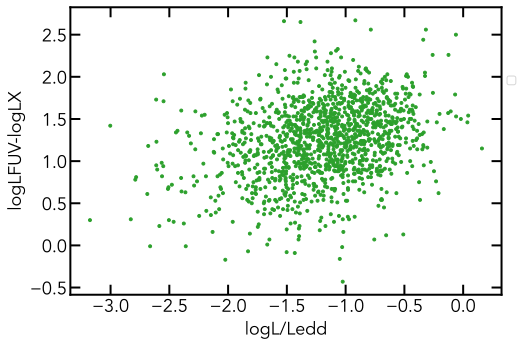

In [41]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logL/Ledd'][i]
    y=data_Stern2012['logLFUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logL/Ledd')
plt.ylabel(r'logLFUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/L_eddrate_LFUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### LX alpha_NUV_X

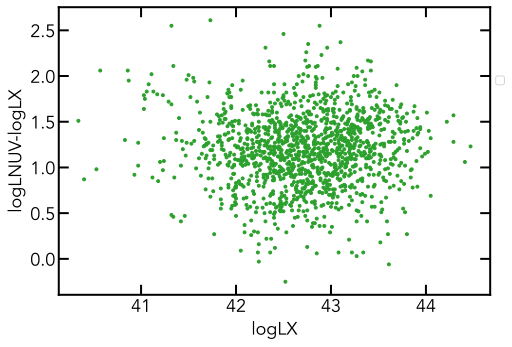

In [42]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLX'][i]
    y=data_Stern2012['logLNUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLX')
plt.ylabel(r'logLNUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/LX_LNUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

### LX alpha_FUV_X

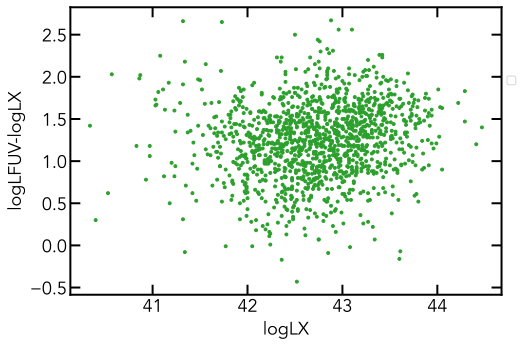

In [43]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Stern2012)):
    color=colors_10(2)
    label=''
    x=data_Stern2012['logLX'][i]
    y=data_Stern2012['logLFUV'][i]
    z=data_Stern2012['logLX'][i]
    if x and y and z:
        ax.errorbar(x, y-z,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLX')
plt.ylabel(r'logLFUV-logLX')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/LX_LFUV-Lx.png',dpi=400,transparent=False,bbox_inches='tight')

## Stern2012b

data_Stern2012b=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. II.J_MNRAS_426_2703//table1.dat',
                      readme="/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. II.J_MNRAS_426_2703/ReadMe",
                      format="ascii.cds",)

In [52]:
data_Stern2012b=pd.read_excel('/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. II.J_MNRAS_426_2703/II.xlsx',sheet_name='Sheet1',header=None)

In [ ]:
  1- 19  A19   ---     Name     SDSS name (JHHMMSS.s+DDMMSS.s)
 21- 24  F4.1  [10-7W] LbHa     Luminosity of broad H{alpha} line (1)
 26- 30  I5    km/s    FWHM     Full width at half-maximum of the fit
 32- 35  F4.1  [10-7W] L[OIII]  Luminosity of [OIII] line (1)
 37- 40  F4.1  [10-7W] LnHa     Luminosity of narrow H{alpha} line (1)
 42- 45  F4.1  [10-7W] LUV      ?=- UV luminosity at rest energy of 1528{AA} (1)
 47- 50  F4.1  [10-7W] LX       ?=- X-ray luminosity at rest energy of 2keV (1)
 52- 54  A3    ---   f_L[OIII]  [UE -] Upper limit or large error on L[OIII] (1)
     55  A1    ---     ---      [,]
 56- 58  A3    ---   f_LnHa     [UEOA -] Upper limit or problematic LnHa (1)
     59  A1    ---     ---      [,]
 60- 62  A3    ---   f_LUV      [UN -] Upper limit or not observed UV (1)
     63  A1    ---     ---      [,]
     64  A1    ---   f_LX       [U-] Upper limit on LX (1)

In [54]:
data_Stern2012b.columns=['Name','LbHa','FWHM','L[OIII]','LnHa','LUV','LX','f_L[OIII]','f_LnHa','f_LUV','f_LX']

In [67]:
data_Stern2012b

Name  LbHa  FWHM  L[OIII]  LnHa   LUV    LX f_L[OIII]  \
0     J000202.95-103037.9  41.9  2310     41.4  41.5  43.8  42.6         -   
1     J000410.80-104527.2  42.6  1360     41.5  41.9  44.6  43.2         -   
2     J000611.55+145357.2  42.1  3320     40.6  41.0    44  42.6         -   
3     J000614.36-010847.2  41.6  3910     40.9  41.1  43.2  41.9         -   
4     J000657.76+152550.0  41.5  3020     40.8  40.7    43  41.7         -   
...                   ...   ...   ...      ...   ...   ...   ...       ...   
3405  J234932.76-003645.6  43.4  3020     42.2  42.2  45.1  43.0         -   
3406  J235000.27+134533.1  42.7  2670     41.6  41.7  44.5  42.9         -   
3407  J235128.78+155259.0  42.2  7870     41.8  41.5  43.5  42.3         -   
3408  J235156.12-010913.3  43.6  5420     42.4  42.2  45.5  44.0         -   
3409  J235654.30-101605.4  42.5  3630     42.1  41.9  43.8  41.8         -   

     f_LnHa f_LUV f_LX  
0        ,-    ,-   ,-  
1        ,-    ,-   ,-  
2        ,-    ,-   ,-  
3        ,-    ,-   ,U  
4        ,-    ,-   ,U  
...     ...   ...  ...  
3405     ,-    ,-   ,U  
3406     ,-    ,-   ,-  
3407     ,-    ,-   ,-  
3408     ,O    ,-   ,-  
3409     ,-    ,-   ,U  

[3410 rows x 11 columns]

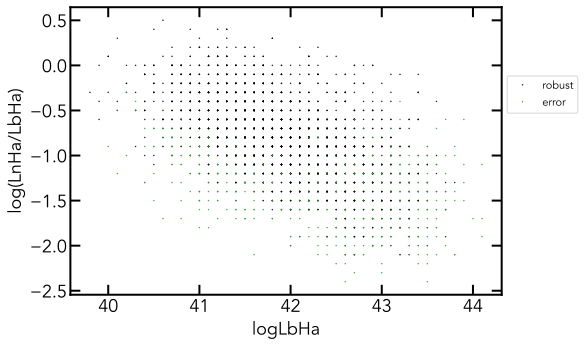

In [72]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

data_plot=data_Stern2012b

for i in range(len(data_plot)):
    

    x=data_plot['LbHa'][i]
    y=data_plot['LnHa'][i]
    if data_plot['f_LnHa'][i]==',-':
        color='black'
        label='robust'
    else:
        color=colors_10(2)
        label='error'
        
    if x and y :
        ax.errorbar(x, y-x,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,markersize=1,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#ax.semilogx()
#ax.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLbHa')
plt.ylabel(r'log(LnHa/LbHa)')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/II_LbHa_LnHa_LbHa.png',dpi=400,transparent=False,bbox_inches='tight')

ValueError: 'x' and 'y' must have the same size

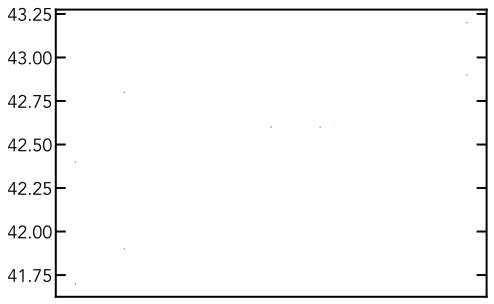

In [68]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

data_plot=data_Stern2012b

for i in range(len(data_plot)):
    color=colors_10(2)
    label=''
    x=data_plot['LUV'][i]
    y=data_plot['LX'][i]
    if x and y :
        ax.errorbar(x,y,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,markersize=1,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#ax.semilogx()
#ax.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLUV')
plt.ylabel(r'log(LX)')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/II_LUV_LX.png',dpi=400,transparent=False,bbox_inches='tight')

## Stern2012c

In [69]:
data_Stern2012c_AGNhost=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. III.J_MNRAS_431_836//table1.dat',
                      readme="/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. III.J_MNRAS_431_836//ReadMe",
                      format="ascii.cds",)

In [70]:
data_Stern2012c_AGNhost

<Table length=3175>
        Name        logLbHa   Dv   l_logM* ... l_logLUV  logLUV l_alpha  alpha 
                    [10-7W] km / s         ...          [10-7W]                
       str19        float64 int64    str1  ...   str1   float64   str1  float64
------------------- ------- ------ ------- ... -------- ------- ------- -------
J000202.95-103037.9    41.9   2310      -- ...       --    43.8      --    -1.5
J000410.80-104527.2    42.6   1360      -- ...       --    44.6      --   -1.57
J000611.55+145357.2    42.1   3320      -- ...       --    44.0      --   -1.57
J000614.36-010847.2    41.6   3910      -- ...       --    43.2       <   -1.54
J000657.76+152550.0    41.5   3020      -- ...       --    43.0       <   -1.57
J000805.62+145023.4    41.4   7530      -- ...       --    43.0      --   -1.26
J000813.22-005753.3    42.1   5040      -- ...       --    43.2      --   -1.17
J000943.14-090839.1    43.2   4150       < ...       --    44.6      --   -1.68
J001056.25-090109.9    41.6   3590      -- ...       --    -1.0      --    -1.0
                ...     ...    ...     ... ...      ...     ...     ...     ...
J232714.52-102317.5    41.2   2100      -- ...        <    41.6       <   -0.99
J232721.96+152437.3    42.0   9210      -- ...       --    43.3       <   -1.81
J232800.55+133512.9    42.1   5040      -- ...       --    43.9       <   -1.63
J233254.46+151305.4    43.1   8390      -- ...       --    44.7       <   -1.84
J233424.09-005324.7    41.4   7330      -- ...       --    42.5       <   -1.24
J234054.40-104722.0    41.6   2260      -- ...       --    43.7      --   -1.62
J234932.76-003645.6    43.4   3020      -- ...       --    45.1       <   -1.88
J235000.27+134533.1    42.7   2530      -- ...       --    44.5      --   -1.65
J235128.78+155259.0    42.2   7870      -- ...       --    43.5      --   -1.47
J235156.12-010913.3    43.6   5420       < ...       --    45.5      --   -1.61

In [45]:
data_Stern2012c_narraw=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. III.J_MNRAS_431_836//table2.dat',
                      readme="/Users/brettlv/Downloads/CLAGN_statistic_plot/Stern2012/Type 1 AGN at low z. III.J_MNRAS_431_836//ReadMe",
                      format="ascii.cds",)

In [46]:
data_Stern2012c_narraw.colnames

['Name',
 'l_logLHb',
 'logLHb',
 'l_logL[OIII]',
 'logL[OIII]',
 'l_logLHa',
 'logLHa',
 'l_logL[NII]',
 'logL[NII]',
 'l_logL[SII]',
 'logL[SII]',
 'l_logL[OI]',
 'logL[OI]',
 'fs',
 'fa',
 'BPT-[NII]',
 'BPT-[SII]',
 'BPT-[OI]']

In [47]:
data_Stern2012c_narraw

<Table length=3175>
        Name        l_logLHb  logLHb ... BPT-[NII] BPT-[SII] BPT-[OI]
                             [10-7W] ...                             
       str19          str1   float64 ...    str9      str7    str10  
------------------- -------- ------- ... --------- --------- --------
J000202.95-103037.9       --    40.7 ...       AGN   Seyfert  Seyfert
J000410.80-104527.2       --    41.3 ... Composite        SF       SF
J000611.55+145357.2       --    40.2 ... Composite        SF  Seyfert
J000614.36-010847.2       --    40.4 ... Composite        SF       SF
J000657.76+152550.0       --    40.2 ... Composite   Seyfert  Seyfert
J000805.62+145023.4       --    39.5 ...       AGN   Seyfert  Seyfert
J000813.22-005753.3       --    40.9 ...       AGN   Seyfert  Seyfert
J000943.14-090839.1        <    40.9 ...       AGN     LINER    LINER
J001056.25-090109.9       --    40.1 ... Composite        SF  Seyfert
                ...      ...     ... ...       ...       ...      ...
J232714.52-102317.5       --    40.5 ... Composite        SF       SF
J232721.96+152437.3       --    40.2 ...       AGN   Seyfert  Seyfert
J232800.55+133512.9       --    40.1 ...       AGN        SF  Seyfert
J233254.46+151305.4       --    40.9 ...       AGN   Seyfert  Seyfert
J233424.09-005324.7       --    40.1 ...       AGN   Seyfert  Seyfert
J234054.40-104722.0       --    40.9 ... Composite        SF       SF
J234932.76-003645.6       --    41.5 ... Composite        SF  Seyfert
J235000.27+134533.1       --    40.9 ... Composite        SF  Seyfert
J235128.78+155259.0       --    40.9 ...       AGN   Seyfert  Seyfert
J235156.12-010913.3       --    41.5 ...       AGN   Seyfert  Seyfert

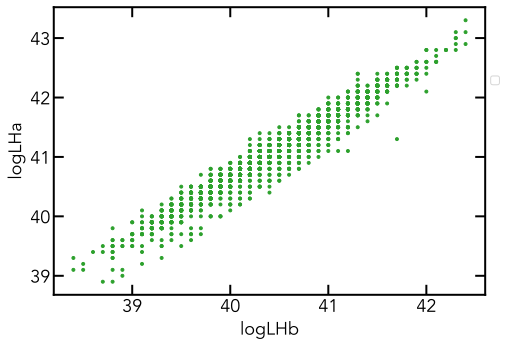

In [48]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

data_plot=data_Stern2012c_narraw

for i in range(len(data_plot)):
    color=colors_10(2)
    label=''
    x=data_plot['logLHb'][i]
    y=data_plot['logLHa'][i]
    
    if x and y :
        ax.errorbar(x, y,
                #yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel(r'logLHb')
plt.ylabel(r'logLHa')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/III_Hb_Ha.png',dpi=400,transparent=False,bbox_inches='tight')

# Trump2011
Accretion rate of AGNs from COSMOS surveys : J/ApJ/733/60


data_Trump2011=Table.read('ftp://cdsarc.u-strasbg.fr/pub/cats/J/ApJ/733/60/table2.dat',
                      readme="ftp://cdsarc.u-strasbg.fr/pub/cats/J/ApJ/733/60/ReadMe",
                      format="ascii.cds",)

In [ ]:
data_Trump2011=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Trump2011/table2.dat',
                      readme='/Users/brettlv/Downloads/CLAGN_statistic_plot/Trump2011/ReadMe',
                      format="ascii.cds",)

In [ ]:
data_Trump2011

In [ ]:
Trump2011_type=[]
for i in data_Trump2011['Type']:
    if i not in Trump2011_type:
        Trump2011_type.append(i)

In [ ]:
Trump2011_type

## L-M

In [ ]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Trump2011['logL'])):
    if data_Trump2011['Type'][i]==Trump2011_type[0]:
        label=r'BL'
        color=colors_10(0)
        
    elif data_Trump2011['Type'][i]==Trump2011_type[1]:
        label=r'NL'
        color=colors_10(1)
        
    elif data_Trump2011['Type'][i]==Trump2011_type[2]:
        label=r'OD'
        color=colors_10(2)        
        
    ax.errorbar(data_Trump2011['logM'][i], data_Trump2011['logL'][i],#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker='.')
#log L = 35 +2/3log M     
LogM_x=np.linspace(4,10,20)
logL_y = 35+ 2.0/3 *LogM_x
ax.plot(LogM_x,logL_y,label="EH09")
ax.axhline(42,ls=':')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('logM')
plt.ylabel('logL')

## eddrate>1

In [ ]:
data_Trump2011_eddrate=data_Trump2011['logL']-data_Trump2011['logM']-np.log10(1.26e38)
data_Trump2011['edd_rate']=data_Trump2011_eddrate
data_Trump2011[data_Trump2011_eddrate>1]

In [ ]:
10h	0m	57.79s	+	2d	39m	32.5s

10h	1m	32.86s +	1d	38m	47.3s

In [ ]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)



In [ ]:
D_cm=cosmo.luminosity_distance(z=0.042436).to(u.cm)
D_cm

In [ ]:
D_Mpc=cosmo.luminosity_distance(z=0.042436).to(u.Mpc)

In [ ]:
D_Mpc

In [ ]:
D_cm=cosmo.luminosity_distance(z=0.73587).to(u.cm)
#BH_mass=10**7.84*u.solMass
#Ledd=1.26*10**38*BH_mass/u.solMass
Lx=4*np.pi*D_cm.value**2*2.31e-14#
Leddrate=np.log10(4*np.pi*D_cm.value**2*2.31e-14*10)-np.log10(1.26e38)-9.3

In [ ]:
print(D_cm,Lx,Leddrate)

## L-Lrate

In [ ]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Trump2011['logL'])):
    if data_Trump2011['Type'][i]==Trump2011_type[0]:
        label=r'BL'
        color=colors_10(0)
        marker='o'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[1]:
        label=r'NL'
        color=colors_10(1)
        marker='+'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[2]:
        label=r'OD'
        color=colors_10(2)   
        marker='^'
        
    #Ledd=1.26*10**38*BH_mass/u.solMass 
    
    ax.errorbar(data_Trump2011['logL'][i]-data_Trump2011['logM'][i]-np.log10(1.26e38), data_Trump2011['logL'][i],#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker=marker)
Leddrate_x=np.linspace(-6.5,-4,20)
logL_y = 28.8 - 2 *Leddrate_x
ax.plot(Leddrate_x,logL_y,label="EH09")
    
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('logL/Ledd')
plt.ylabel('logL')

# EH09 

(left) log L = 35 +2/3log M 
and (right) 
log L = 28.8 − 2 log(L/LEdd).

# CLAGN

In [ ]:
timelag_sources=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='工作表2')
timelag_sources=timelag_sources[timelag_sources['select']==1.0]
timelag_sources=timelag_sources.reset_index(drop=True)
timelag_sources['Lbol11']=timelag_sources['Lbol']/10**11/(3.828e26*10**7)
timelag_sources['logLbol11']=np.log10(timelag_sources['Lbol11'])
timelag_sources['logLbol']=np.log10(timelag_sources['Lbol'])

timelag_sources['color']='black'
timelag_sources['label']='type'

for i in range(len(timelag_sources)):
    
    if timelag_sources['type'][i].split(' ')[0]=='CLAGN':
        timelag_sources['color'][i]='r'
        timelag_sources['label'][i]='CLAGN'

    elif timelag_sources['type'][i].split(' ')[1]=='2':
        timelag_sources['color'][i]='g'
        timelag_sources['label'][i]='Type2'

    else:
        timelag_sources['color'][i]='b'
        timelag_sources['label'][i]='Type1'

In [ ]:
timelag_sources

## M-L

In [ ]:
fig = plt.figure(figsize=(6, 6))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Trump2011['logL'])):
    if data_Trump2011['Type'][i]==Trump2011_type[0]:
        label=r'BL'
        #color=colors_10(0)
        color='grey'
        marker='o'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[1]:
        label=r'NL'
        color=colors_10(1)
        marker='+'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[2]:
        label=r'OD'
        color=colors_10(1)   
        marker='^'     
        
    ax.errorbar(data_Trump2011['logM'][i], data_Trump2011['logL'][i],#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker=marker)

ax.errorbar(data_Stern2012['logm'], data_Stern2012['logL'],#yerr=xray['e_Fx'][i],
                ls='',color='grey',label='Stern2012',
                marker='o')    
    
#log L = 35 +2/3log M     
LogM_x=np.linspace(4,10,20)
logL_y = 35+ 2.0/3*LogM_x
ax.plot(LogM_x,logL_y,label="EH09")
ax.axhline(42,ls=':',label='ES06')

logL_y_Laor03=41.8+2*LogM_x -16
ax.plot(LogM_x,logL_y_Laor03,label="Laor03")

#rgs s21 where M8 is the mass of 
#L ∼ 43 15/8 y(m)m˙ min Edd 8 (m)
logL_y_Nicastro00=43+15/8.0*LogM_x -8*15/8.0
ax.plot(LogM_x,logL_y_Nicastro00,label="Nicastro00")



for i in range(len(timelag_sources)):
    
    if timelag_sources['type'][i].split(' ')[0]=='CLAGN':
        color='r'
        label='CLAGN'
        marker='*'
    elif timelag_sources['type'][i].split(' ')[1]=='2':
        color='g'
        label='Type2'
        marker='+'
    else:
        color='b'
        label='Type1'
        marker='.'
    
    x=timelag_sources['logmass'][i]
    y=timelag_sources['logLbol'][i]
    ax.errorbar(x,y,color=color,marker=marker,label=label) #   
        
        
texts = [ax.text(timelag_sources['logmass'][i], timelag_sources['logLbol'][i],
                 timelag_sources['Name'][i],
                 fontsize=9,color=timelag_sources['color'][i]) for i in range(len(timelag_sources))]
adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.5,1.3),
            expand_points=(1.5,1.3),
            expand_objects=(1.5, 1.3),
            expand_align=(1.5, 1.3),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.75, 0.4),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('logM')
plt.ylabel('logL')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/M_L_correlation.png',dpi=400,transparent=False,bbox_inches='tight')

## Lrate_L

In [ ]:
fig = plt.figure(figsize=(6, 6))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


for i in range(len(data_Trump2011['logL'])):
    if data_Trump2011['Type'][i]==Trump2011_type[0]:
        label=r'BL'
        #color=colors_10(0)
        color='grey'
        marker='o'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[1]:
        label=r'NL'
        color=colors_10(1)
        marker='+'
        
    elif data_Trump2011['Type'][i]==Trump2011_type[2]:
        label=r'OD'
        color=colors_10(1)   
        marker='^'
        
    #Ledd=1.26*10**38*BH_mass/u.solMass 
    
    ax.errorbar(data_Trump2011['logL'][i]-data_Trump2011['logM'][i]-np.log10(1.26e38), data_Trump2011['logL'][i],#yerr=xray['e_Fx'][i],
                ls='',color=color,label=label,
                marker=marker)
    
ax.errorbar(data_Stern2012['logL/Ledd'], data_Stern2012['logL'],#yerr=xray['e_Fx'][i],
                ls='',color='grey',label='Stern2012',
                marker='o')    
    
    
Leddrate_x=np.linspace(-6.5,-4,20)
logL_y = 28.8 - 2 *Leddrate_x
ax.plot(Leddrate_x,logL_y,label="EH09")


for i in range(len(timelag_sources)):
    
    if timelag_sources['type'][i].split(' ')[0]=='CLAGN':
        color='r'
        label='CLAGN'
        marker='*'
    elif timelag_sources['type'][i].split(' ')[1]=='2':
        color='g'
        label='Type2'
        marker='+'
    else:
        color='b'
        label='Type1'
        marker='.'
    
    x=timelag_sources['logLbol'][i]-timelag_sources['logmass'][i]-np.log10(1.26e38)
    y=timelag_sources['logLbol'][i]
    ax.errorbar(x,y,color=color,marker=marker,label=label) #   
        
        
texts = [ax.text(timelag_sources['logLbol'][i]-timelag_sources['logmass'][i]-np.log10(1.26e38), timelag_sources['logLbol'][i],
                 timelag_sources['Name'][i],
                 fontsize=9,color=timelag_sources['color'][i]) for i in range(len(timelag_sources))]

adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.5,1.3),
            expand_points=(1.5,1.3),
            expand_objects=(1.5, 1.3),
            expand_align=(1.5, 1.3),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.75, 0.45),
          ncol=1,fontsize=11,loc=2)    
      

#plt.semilogx()
#plt.semilogy()
#plt.xlim(58200,58600)
#plt.ylim(1.0e0,1.0e4)
#plt.xlim(1e-5,1e-2)
plt.xlabel('logL/Ledd')
plt.ylabel('logL')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Lrate_L_correlation.png',dpi=400,transparent=False,bbox_inches='tight')

## L-lag

In [ ]:
fig = plt.figure(figsize=(6, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax=fig.add_subplot(1,1,1)
#ax.set_title('NGC1566_V')

#print(D_cm_cosmo.to(u.Mpc))
#print(np.mean(Lbol_V_11))
#print(np.mean(Lbol_Xray11))

Lagnrange=np.logspace(-2.5,1.0)
tau_Lagn= (Lagnrange)**(0.47)*10**2.1


for i in range(len(timelag_sources)):
    
    if timelag_sources['type'][i].split(' ')[0]=='CLAGN':
        color='r'
        label='CLAGN'
        marker='*'
    elif timelag_sources['type'][i].split(' ')[1]=='2':
        color='g'
        label='Type2'
        marker='+'
    else:
        color='b'
        label='Type1'
        marker='.'
    
    x=timelag_sources['logLbol11'][i]
    y=timelag_sources['timelag'][i]
        
    if timelag_sources['lag_lower'][i]>0: 
        yerr=[timelag_sources['lag_lower'][i],timelag_sources['lag_upper'][i]]
               
        if timelag_sources['Lupper'][i]>0: 
            print(i,timelag_sources['Name'][i],x,y,yerr[0],yerr[1],y-yerr[0],y+yerr[1])             
            xmax= np.log10(timelag_sources['Lupper'][i]/10**11/(3.828e26*10**7))     
            print('L_range',x,xmax)
            
            ax.vlines(x,ymin=y-yerr[0],ymax=y+yerr[1],color=color,linewidth=2,ls='-',zorder=1)
            ax.hlines(y,timelag_sources['logLbol11'][i],xmax,color=color,linewidth=2,ls='-',zorder=1)           
            
        else:
            print(i,timelag_sources['Name'][i],x,y,yerr[0],yerr[1],'lag range',y-yerr[0],y+yerr[1])   
            ax.errorbar(x,y,color=color,marker=marker,label=label)
            ax.vlines(x,ymin=y-yerr[0],ymax=y+yerr[1],color=color,linewidth=2,ls='-',zorder=1)

               
    else:
        if timelag_sources['Lupper'][i]>0:           
            xmax= np.log10(timelag_sources['Lupper'][i]/10**11/(3.828e26*10**7)) 
            print(i,timelag_sources['Name'][i],'L_range',x,xmax)
            ax.hlines(y,x,xmax,color=color,linewidth=2,ls='-',zorder=0)  
            
        else:
            print(i,timelag_sources['Name'][i],x,y)
            ax.errorbar(x,y,color=color,marker=marker,label=label,zorder=2) #   
        
        
    
texts = [ax.text(timelag_sources['logLbol11'][i], timelag_sources['timelag'][i],
                 timelag_sources['Name'][i],fontsize=9,color=timelag_sources['color'][i]) for i in range(len(timelag_sources))]

adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.5,1.3),
            expand_points=(1.5,1.3),
            expand_objects=(1.5, 1.3),
            expand_align=(1.5, 1.3),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text

   
#ax.vlines(np.log10(np.mean(Lbol_V_11)),59-19.3,59+14.1,color='red')#,label='NGC 1556(30-70 days)')  
#ax.errorbar(np.mean(Lbol_11),36,xerr=np.std(Lbol_11),markersize=11,color='black',fmt='*',label='NGC1566') #(36 day)
#ax.errorbar(np.log10(np.mean(Lbol_V_11)),59,xerr=np.std(Lbol_V_11),markersize=11,color='red',fmt='*',label='NGC1566') #


#ax.errorbar(np.mean(Lbol_11_median),36,xerr=np.std(Lbol_11_median),markersize=11,color='grey',fmt='*',label='NGC1566') #(36 day)
#ax.vlines(np.mean(Lbol_11_median),30,70,color='grey')#,label='NGC 1556(30-70 days)') 

'''ax.errorbar(4.3e43*8/10**11/(3.828e26*10**7),127.5,
            marker='o',ms=11., mew=1, capsize=0,mec='grey',ecolor='grey',
            elinewidth=2,fmt='o',ls='',fillstyle='none',          
            label='NGC 2110')''' 

#ax.errorbar(7.68e46/10**11/(3.828e26*10**7),296,fmt='v',label='HE0435-4312') 
#ax.errorbar(7.68e46/10**11/(3.828e26*10**7),658,fmt='v',label='HE0435-4312') 

#ax.text(0.8, 0.85, 'W1 ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax.transAxes, fontsize = 16)

ax.errorbar(np.log10(Lagnrange),tau_Lagn,ls='--',label='PG quasars',color='grey',zorder=0) 
#ax.errorbar(0.078,30,yerr=[10,40],fmt='.',label='NGC 1556') 
  

set_ax_tick(ax)

#ax.set_xlim(timerangel,timeranger)
#ax.set_xlim(-2.5,2.5)
#ax.set_ylim(20,300)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
#by_label = OrderedDict(zip(labels, hdl)) 
# use them in the legend
by_label = OrderedDict(zip(labels, handles)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
ax.semilogy()
#ax.semilogx()
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))
plt.title('IR time lag vs Lbol ')        
ax.set_ylabel(r'$\tau_{obs}(days)$')
ax.set_xlabel(r'log$L_{bol}(10^{11}L_{\odot})$')
fig.savefig('/Users/brettlv/Downloads/NGC1566/tau_obs_L_correlation.png',dpi=400,transparent=False,bbox_inches='tight')

# ccf

In [ ]:
def write_ccf_data(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir):     
    data1= dataname1[dataname1['t']>rangemin]
    data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(ccf_datadir,labelname1+'.csv')
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>rangemin]
    data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(ccf_datadir,labelname2+'.csv')
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2

In [ ]:
def run_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    path_data1,path_data2=write_ccf_data(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir)
    command='python2 ccf_1ES1927_cpython.py %s %s  %d %d %d %d'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh)
    print(command)
    os.system(command)  
    

In [ ]:
def plot_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    path_data1,path_data2=write_ccf_data(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir)
    command='python3 ccf_1ES1927_plot3.py %s %s  %d %d %d %d'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh)
    print(command)
    os.system(command) 

In [ ]:
ccf_datadir='/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/1ES1927_ccf/data'
ccf_dir='/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/1ES1927_ccf'

In [ ]:
xray.columns

In [ ]:
lag_xray_1ES1927=pd.DataFrame({'t':xray['mjd'],'flux':xray['Fx'],\
                                  'err':xray['e_Fx']},\
                                 index=None,columns=['t','flux','err'])

lag_xray_1ES1927=lag_xray_1ES1927.sort_values('t')
lag_xray_1ES1927=lag_xray_1ES1927.reset_index(drop=True)

In [ ]:
lag_Halpha_1ES1927=pd.DataFrame({'t':Halpha['mjd'],'flux':Halpha['EW'],\
                                  'err':Halpha['e_EW']},\
                                 index=None,columns=['t','flux','err'])

lag_Halpha_1ES1927=lag_Halpha_1ES1927.sort_values('t')
lag_Halpha_1ES1927=lag_Halpha_1ES1927.reset_index(drop=True)

In [ ]:
Hbeta.columns

In [ ]:
lag_Hbeta_1ES1927=pd.DataFrame({'t':Hbeta['mjd'],'flux':Hbeta['EW'],\
                                  'err':Hbeta['e_EW']},\
                                 index=None,columns=['t','flux','err'])

lag_Hbeta_1ES1927=lag_Hbeta_1ES1927.sort_values('t')
lag_Hbeta_1ES1927=lag_Hbeta_1ES1927.reset_index(drop=True)

In [ ]:
optical.columns

In [ ]:
m(AB) = -2.5 log(f) - 48.60

In [ ]:
ASAS_SN=optical[optical['Tel']=='ASAS-SN   ']
ASAS_SN_V=ASAS_SN[ASAS_SN['Filt']=='V']
ASAS_SN_V['err_logflux']=0
ASAS_SN_V['logflux']=(-48.6-ASAS_SN_V['mag'])/2.5
ASAS_SN_V['err_logflux']=ASAS_SN_V['e_mag']/2.5

ASAS_SN_V=ASAS_SN_V.fillna(value=0)

lag_ASAS_SN_V_1ES1927=pd.DataFrame({'t':ASAS_SN_V['mjd'],'flux':ASAS_SN_V['logflux'],\
                                  'err':ASAS_SN_V['err_logflux']},\
                                 index=None,columns=['t','flux','err'])

lag_ASAS_SN_V_1ES1927=lag_ASAS_SN_V_1ES1927.sort_values('t')
lag_ASAS_SN_V_1ES1927=lag_ASAS_SN_V_1ES1927.reset_index(drop=True)

## X-ray V

In [ ]:
labelname1="Xray"
labelname2="V"
dataname1=lag_xray_1ES1927
dataname2=lag_ASAS_SN_V_1ES1927
rangemin,rangemax=58200,58600

os.chdir(ccf_dir)
run_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=180)

In [ ]:
plot_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=180)

In [ ]:
import matplotlib.pyplot as plt

## X-ray Hbeta

In [ ]:
labelname1="Xray"
labelname2="Hbeta"
dataname1=lag_xray_1ES1927
dataname2=lag_Hbeta_1ES1927
rangemin,rangemax=58200,58600

os.chdir(ccf_dir)
run_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=180)

In [ ]:
plot_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=180)

In [ ]:
labelname1="Halpha"
labelname2="Hbeta"
dataname1=lag_Halpha_1ES1927
dataname2=lag_Hbeta_1ES1927
rangemin,rangemax=58000,58600

os.chdir(ccf_dir)
run_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=100)

In [ ]:
plot_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=100)

## V Hbeta

In [ ]:
labelname1="V"
labelname2="Hbeta"
dataname1=lag_ASAS_SN_V_1ES1927
dataname2=lag_Hbeta_1ES1927
rangemin,rangemax=58150,58600

os.chdir(ccf_dir)
run_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=100)

In [ ]:
plot_ccf(labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,ccf_datadir,lagrangel=0,lagrangeh=100)